# Spam Filtering Logistic Regression

- https://www.kaggle.com/uciml/sms-spam-collection-dataset  

- SMS 스팸 컬렉션은 태그가 지정된 SMS 메시지 집합입니다. 여기에는 5,574 개 메시지 중 영어로 된 SMS 메시지 한 세트가 포함되어 있으며 이에 따라 햄 (합법적) 또는 스팸으로 태그가 지정됩니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sms = pd.read_csv("data/spam.csv", encoding="ISO-8859-1", 
                  usecols=[0, 1], skiprows=1, names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms['label'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
sms.label = sms.label.map({"ham": 0, "spam": 1})

In [6]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

### Train / Test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(sms.message, sms.label, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

### Create Document Train Matrix

- 문장을 token화 하고 각 문장에 token 이 몇 번 등장하는지 count  

- 각 token 을 feature 화하여 feature(단어) 출현 횟수에 따라 spam 여부 분류

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()

### Tokenized Train document matrix  생성

In [17]:
X_train_tokenized = couvec.fit_transform(X_train)
X_train_tokenized

<4457x7649 sparse matrix of type '<class 'numpy.int64'>'
	with 59027 stored elements in Compressed Sparse Row format>

In [41]:
#A list of feature(token) names
names = couvec.get_feature_names()
print(len(names))
print(names[2000:2100])

7649
['cooked', 'cookies', 'cooking', 'cool', 'cooped', 'cooperative', 'copied', 'copies', 'coping', 'cops', 'copy', 'corect', 'cornwall', 'corporation', 'corrct', 'correct', 'correction', 'correctly', 'corrupt', 'corvettes', 'cos', 'cosign', 'cost', 'costa', 'costing', 'costs', 'costume', 'costumes', 'costå', 'couch', 'cougar', 'cough', 'could', 'coulda', 'couldn', 'couldnåõt', 'count', 'countin', 'countinlots', 'country', 'coupla', 'couple', 'courage', 'course', 'court', 'courtroom', 'cousin', 'cover', 'coveragd', 'covers', 'coz', 'cozy', 'cps', 'cr', 'cr01327bt', 'cr9', 'crab', 'crack', 'craigslist', 'crammed', 'cramps', 'crap', 'crash', 'crashed', 'crave', 'craziest', 'crazy', 'crazyin', 'crckt', 'cream', 'created', 'creative', 'creativity', 'credit', 'credited', 'credits', 'creep', 'cres', 'cribbs', 'cricket', 'cricketer', 'crickiting', 'crisis', 'cro1327', 'crore', 'cross', 'croydon', 'crucial', 'crucify', 'cruise', 'crushes', 'cry', 'crying', 'cs', 'csbcm4235wc1n3xx', 'csc', 'cs

In [42]:
# Document-term matrix 출력
# (document no., feature no), count
# print(X_train_tokenized)

- test data 는 train data 에서 fit 한 count vectorizer 를 이용하여 transform

In [43]:
X_test_tokenized = couvec.transform(X_test)
X_test_tokenized

<1115x7649 sparse matrix of type '<class 'numpy.int64'>'
	with 13782 stored elements in Compressed Sparse Row format>

### 이진 분류기 train

In [44]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train_tokenized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predict

- predict() - 예측된 class 를 threshold 0.5 기준으로 반환
- predict_proba() - class 별 probability 를 반환

In [46]:
y_pred = lr_classifier.predict(X_test_tokenized)

print(y_pred)
print()
print("Test set 의 true counts = ", sum(y_test))
print("모델이 예측한 predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 ... 1 1 1]

Test set 의 true counts =  165
모델이 예측한 predicted true counts =  150
accuracy = 0.98


## confusion matrix 를 이용한 model 평가

In [47]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

confution matrix
 [[148  17]
 [  2 948]]


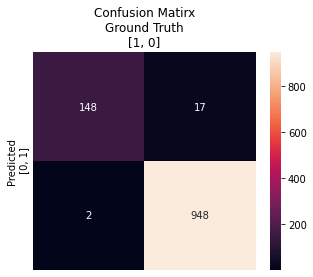

In [48]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None